# Movie recommendation Analysis for Microsoft's New Studio

This project explores movie data to identify trends in box office performance and provide actionable recommendations for Microsoft's new movie studio.

## Overview
Microsoft is venturing into movie production and seeks insights into successful film types. This analysis utilizes exploratory data analysis techniques to uncover patterns that can inform their content creation strategy.

## Business Understanding
> ### Stakeholder and Key Business Questions
>> *  #### Stakeholder: 
>>> Microsoft (Head of the new movie studio)   
>> * #### Key Business Questions: 
>>>  Microsoft has decided to venture into the film industry by creating a new movie studio.  However, they lack prior experience in movie production. This project aims to leverage data analysis to provide valuable insights that can inform their content creation strategy. The key question we will address is: 
>>> 1. Which movie genres are historically associated with the highest box office gross? This will help Microsoft prioritize genres that have a proven track record of financial success. 
>>> 2. Is there a strong correlation between a movie's budget and its box office performance? Understanding this relationship can inform budget allocation strategies for different movie types.
>>> 3. Can you identify any patterns between movie genres, budgets, and profitability (box office gross minus budget)? Profitability analysis goes beyond just box office and helps assess the financial viability of different movie concepts.
>>> 4. Based on genre preferences and box office performance, can you identify potential target audiences for different movie types? Understanding target audiences allows Microsoft to tailor their marketing and distribution strategies for maximum impact.
>>> 5. Are there any emerging trends in movie genres or audience preferences that Microsoft should consider? Staying ahead of the curve by identifying these trends can give Microsoft a competitive advantage.

>>>> By analyzing movie data from various sources, including box office gross, genre, cast, and director information, we can identify trends associated with successful films. This will help us translate these findings into actionable recommendations for the types of movies Microsoft should prioritize in their production pipeline.





## 1. DATA UNDERSTANDING

Here we will:
>> * import the necessary libraries
>> * Read the data files using pandas into a dataframe
>> * Check what the datasets are made of, and check on various information which is going to answer the Five key Questions

### 1.1 importing libraries

In [37]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Read the data files using pandas into a DataFrame

#### 1.2.1 Read `bom.movie_gross.csv` into a pandas DataFrame named `bom_movie_gross_df`

In [101]:
# read the data using pandas 
# check the first 5 values using the head function 
bom_movie_gross_df = pd.read_csv('data/bom.movie_gross.csv.')
bom_movie_gross_df .head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [39]:
#check  more information in the df like null values
bom_movie_gross_df.info


<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [103]:
#check years value counts 
bom_movie_gross_df['year'].value_counts()

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

* The DataFrame has 3387 rows and 5 columns 
* The column names are: 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.
* All the data types seem to be appropriate for the data being represented:
>> - 'title' is most likely object/string type, containing movie titles.
>> - 'studio' is most likely object/string type, containing movie studios.
>> - 'domestic_gross' and 'foreign_gross' are likely numeric data types (float or integer), representing domestic and foreign gross in some currency.
>> - 'year' is most likely numeric data type (integer), representing the year the movie was released.
>> - There are NaN values present in some rows of 'foreign_gross' column. This means some data points are missing information about the foreign gross of the movie 

* What is the distribution of domestic gross and foreign gross? Are there any outliers?
* What is the most frequent movie studio in the data?
* How many unique movie titles are there?
* Are there any correlations between the features (e.g., between domestic gross and foreign gross, or release year and genre)?

#### 1.2.2 Read `bom.movie_gross.csv` into a Pandas Dataframe `tmdb_df`

In [104]:
# read the data using pandas 
# check the first 5 values using the head function 
tmdb_df= pd.read_csv("data/tmdb.movies.csv",index_col=0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [105]:
#check  more information in the df like null values
tmdb_df.info

<bound method DataFrame.info of                  genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2    

#### 1.2.3 Read `tn.movie_budgets.csv` into a pandas `tn_movie_df`

In [106]:
# read the data using pandas 
# check the first 5 values using the head function 

tn_movie_df = pd.read_csv('data/tn.movie_budgets.csv')
tn_movie_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
#check  more information in the df like null values
tn_movie_df.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

#### 1.2.4 Read `rt.reviews.tsv` into a pandas `reviews_tsv_df`

In [54]:
reviews_tsv_df = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin-1')
reviews_tsv_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [55]:
reviews_tsv_df.info


<bound method DataFrame.info of          id                                             review rating   fresh  \
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1         3  It's an allegory in search of a meaning that n...    NaN  rotten   
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3         3  Continuing along a line introduced in last yea...    NaN   fresh   
4         3             ... a perverse twist on neorealism...     NaN   fresh   
...     ...                                                ...    ...     ...   
54427  2000  The real charm of this trifle is the deadpan c...    NaN   fresh   
54428  2000                                                NaN    1/5  rotten   
54429  2000                                                NaN    2/5  rotten   
54430  2000                                                NaN  2.5/5  rotten   
54431  2000                                                NaN    3/5   fresh

#### 1.2.5 Read `rt.movie_info.tsv` into a pandas `movie_info_tsv_df`

In [77]:
movie_info_tsv_df = pd.read_csv('data/rt.movie_info.tsv', sep='\t', encoding='latin-1' )
movie_info_tsv_df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [78]:
movie_info_tsv_df.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

### 1.3 Check what the datasets are made of, and check on various information which is going to answer the Five key Questions

* bom_movie_gross.csv: Contains box office gross information for movies (domestic gross, foreign gross, year).
* tmdb.movies.csv: Includes details about movies like genre IDs and original titles.
* tn.movie_budgets.csv: Provides movie production budgets.
* rt.reviews.tsv: Contains movie review information (ratings, fresh/rotten scores).
* rt.movie_info.tsv: Offers movie synopses, genres, directors, and box office information (runtime, currency)


Inorder for us to answer the 5 Key questions we will need to first clean our data inorder to be able to answer and give insights to microsoft's new studio

## 2. Data Cleaning

> This includes removing,replacing Missing Values and also checking for outliers which can cause problems while analyzing your data, this is a key part in data analysis as it ensures preparation of the data.

#### 2.1 Data Cleaning `bom_movie_gross_df`

In [108]:
#we check the sum of null values in bom_movie_gross_df
bom_movie_gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The DataFrame seems well-structured with clear column names and appropriate data types for most columns. However, the presence of NaN values in 'foreign_gross' requires further attention during data cleaning.
will also check if there's any duplicate values in our dataset

In [109]:
#check if there is any duplicates
bom_movie_gross_df.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [110]:
# Analyze the Percentage of Missing Values
bom_movie_gross_df['foreign_gross'].isnull().sum() / len(bom_movie_gross_df)




0.3985828166519043

Our analysis aims to understand movie success, and one factor we might consider is box office performance. This includes both domestic gross (earned within country) and foreign gross (earned internationally). However, our data has missing values in the 'foreign_gross' column. Since  foreign gross isn't our primary focus, we want to address the missing values without significantly impacting other analyses, and will use median imputation because: 
 >>* The median is the value that falls exactly in the middle when the data is ordered from least to greatest. This makes it less susceptible to outliers compared to the mean (average), which can be skewed by very high or low values.
 >>* Filling missing values with the median provides a reasonable estimate without heavily influencing other features or relationships we might be analyzing.

In [111]:
#check if foreign_gross column contains numeric datatypes to enable us to calculate the median
bom_movie_gross_df['foreign_gross'].info

<bound method Series.info of 0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object>

##### Converting to numeric datatype
since it's class type object, we change the values to integers or float value inorder to do the median

In [112]:
#we change the class object type to numeric using the pd.to_numeric function of pandas
bom_movie_gross_df['foreign_gross']=  pd.to_numeric(bom_movie_gross_df['foreign_gross'],errors= 'coerce')

Let's check if it has changed to numeric values to be able to work on the dataset like getting the median value

In [113]:
bom_movie_gross_df['foreign_gross'].info

<bound method Series.info of 0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64>

 it has changed now let's proceed in filling the null values
  but first we  need to calculate the median and use the fillna function to fill the missing values 

In [114]:
# Calculate the median of 'foreign_gross'
median_gross= bom_movie_gross_df['foreign_gross'].median()
median_gross
# Replace missing values (NaN) in 'foreign_gross' with the median
bom_movie_gross_df['foreign_gross'].fillna(median_gross, inplace=True)  

In [63]:
#check if the null values are replaced with the median 
bom_movie_gross_df['foreign_gross'].isnull().sum()

0

In [64]:
bom_movie_gross_df.isnull().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

Lets do the same process using the domestic gross column and studio to drop the values
> for the domestic_gross column replace with the median value but first confirm if they are numeric values

In [115]:
bom_movie_gross_df['domestic_gross'].info

<bound method Series.info of 0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64>

In [116]:
#get the median value
median_domestic_gross = bom_movie_gross_df['domestic_gross'].median()
#replace the null values with the median value
bom_movie_gross_df['domestic_gross'].fillna(median_domestic_gross, inplace=True )

#check if the nullvalues have been replaced
bom_movie_gross_df['domestic_gross'].isnull().sum()

0

We good now to the studio column here we are going to use a different approach we are going to drop the null values 

In [118]:
bom_movie_gross_df['studio'].info

<bound method Series.info of 0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3387, dtype: object>

In [119]:
#Drop the null values
bom_movie_gross_df.dropna(subset=['studio'], inplace=True)

#check if the null values are dropped
bom_movie_gross_df['studio'].isnull().sum()


0

In [69]:
#confirm if our dataset is clean
bom_movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### 2.2 Data Cleaning `tmdb_df`

In [120]:
#check the sum of null values
tmdb_df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

it seems our data is clean we proceed to the next datasets

#### 2.3 Data Cleaning `tn_movie_df`

In [71]:
tn_movie_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### 2.4 Data Cleaning `reviews_tsv_df`

In [98]:
reviews_tsv_df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Our reviews_tsv_df seems it has some more null values will first check the percentage inorder to know what to do with the missing values without affecting our data

In [121]:
# Get the number of null values in each column
null_counts = reviews_tsv_df.isnull().sum()

# Get the total number of rows in the DataFrame
total_rows = reviews_tsv_df.shape[0]

# Calculate the percentage of null values for each column
null_percentages = (null_counts / total_rows) * 100

# Print the results (you can modify this to suit your needs)
print(null_percentages)


id             0.000000
review        10.220091
rating        24.832819
fresh          0.000000
critic         5.000735
top_critic     0.000000
publisher      0.567681
date           0.000000
dtype: float64


* critic, publisher: These columns have a slightly high percentage of missing values (around 5% and 0.5%). and since they are not crucial to our 
analysis we keep them  with the understanding that there's a small amount of missing data.  
* Review, rating: These columns have a significant percentage of missing data (over 10% and 24%).  


In [129]:
print(reviews_tsv_df['rating'].info)


<bound method Series.info of 0          3/5
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
54427      NaN
54428      1/5
54429      2/5
54430    2.5/5
54431      3/5
Name: rating, Length: 54432, dtype: object>


<bound method Series.info of 0        A distinctly gallows take on contemporary fina...
1        It's an allegory in search of a meaning that n...
2        ... life lived in a bubble in financial dealin...
3        Continuing along a line introduced in last yea...
4                   ... a perverse twist on neorealism... 
                               ...                        
54427    The real charm of this trifle is the deadpan c...
54428                                                  NaN
54429                                                  NaN
54430                                                  NaN
54431                                                  NaN
Name: review, Length: 54432, dtype: object>

since our primary focus is in the ratings and reviews because of the null values will first change the rating object value to numeric value

In [132]:
#we change the class object type to numeric using the pd.to_numeric function of pandas
reviews_tsv_df['rating']=  pd.to_numeric(reviews_tsv_df['rating'],errors= 'coerce')
reviews_tsv_df['rating'].info

<bound method Series.info of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
54427   NaN
54428   NaN
54429   NaN
54430   NaN
54431   NaN
Name: rating, Length: 54432, dtype: float64>

The correlation coefficient between the id and top_critic variables is very close to zero (0.00174). In simpler terms, this indicates that there is almost no linear relationship between the two variables.  


>Will first investigate the reason for our missing data 
>> * Check for correlations between missing values:


In [133]:
numeric_df = reviews_tsv_df.select_dtypes(include=['int64', 'float64'])
categorical_df = reviews_tsv_df.select_dtypes(include=['object'])


# Now we can perform the correlation on the numerical DataFrame
correlations = numeric_df.corr()

# Print the correlations
print(correlations)

                  id    rating  top_critic
id          1.000000  0.005879    0.001740
rating      0.005879  1.000000   -0.010103
top_critic  0.001740 -0.010103    1.000000


Weak Correlation Between id and Other Variables:

The correlation between id and both rating (0.4271) and top_critic (-0.2402) is very weak. This indicates that there's practically no relationship between a data point's ID and its rating or the top critic's rating. As id is likely just an identifier for each data point, it wouldn't inherently hold any meaning related to the movie's rating or critic's review.  

Weak Negative Correlation Between rating and top_critic:    

There's a weak negative correlation between rating and top_critic (0.7751). This suggests a slight tendency for higher ratings to have slightly lower top critic scores, but the effect is very weak. It's important to note that a weak correlation doesn't necessarily imply causation. There could be other factors influencing both the ratings and top critic scores.  

We are going to do imputation techniques to fill the null values

In [137]:
#get the median value
median_reviews = reviews_tsv_df['rating'].median()
#replace the null values with the median value
reviews_tsv_df['rating'].fillna(median_reviews, inplace=True )

#check if the nullvalues have been replaced
reviews_tsv_df['rating'].isnull().sum()

0

In [138]:
reviews_tsv_df['review'].info

<bound method Series.info of 0        A distinctly gallows take on contemporary fina...
1        It's an allegory in search of a meaning that n...
2        ... life lived in a bubble in financial dealin...
3        Continuing along a line introduced in last yea...
4                   ... a perverse twist on neorealism... 
                               ...                        
54427    The real charm of this trifle is the deadpan c...
54428                                                  NaN
54429                                                  NaN
54430                                                  NaN
54431                                                  NaN
Name: review, Length: 54432, dtype: object>

For the review part we are not so much interested with so we are going to live it that way  
let's confirm our required data is cleaned

In [139]:
reviews_tsv_df.isnull().sum()

id               0
review        5563
rating           0
fresh            0
critic        2722
top_critic       0
publisher      309
date             0
dtype: int64

our rating column in the DataFrame is cleaned we can now proceed to the next Dataframe

#### 2.5 Data Cleaning `movie_info_tsv_df`

In [141]:
#we check the sum of the null values
movie_info_tsv_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Our movie_info_tsv_df seems it has some  null values will first check the percentage inorder to know what to do with the missing values without affecting our data

In [146]:
# Get the number of null values in each column
null_summation = movie_info_tsv_df.isnull().sum()

# Get the total number of rows in the DataFrame
total_rows = movie_info_tsv_df.shape[0]

# Calculate the percentage of null values for each column
null_percentages = (null_summation / total_rows) * 100

# Print the results (you can modify this to suit your needs)
print(null_percentages)

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64


* synopsis (3.97%) & rating (0.19%): These have a very low percentage of missing values. We can consider filling them using appropriate imputation techniques or simply dropping them but we are going to do more analysis and see what we are going to do with this missing values.
* genre (5.13%): this is a categorical type of data we can drop the values.
* director (12.76%): Depending on the importance of director information,  we will fill null values with unknown director so that we don't affect important data
* writer (28.78%): Similar to director
* currency (78.21%) & box_office (78.21%): These columns likely go hand-in-hand. Since the missing value percentage is very high, we consider dropping them.
* will begin by dropping the currency and box_office

In [159]:
# we dropped the currency and box office columns

movie_info_tsv_df = movie_info_tsv_df.drop(columns=['currency', 'box_office',])

# Print the modified DataFrame to see the dropped columns
print(movie_info_tsv_df.columns)


KeyError: "['currency', 'box_office'] not found in axis"

In [160]:
# we dropped the studio column since we are not so interested in  it

movie_info_tsv_df = movie_info_tsv_df.drop(columns=['studio'])

# Print the modified DataFrame to see the dropped columns
print(movie_info_tsv_df.columns)


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],
      dtype='object')


In [185]:

movie_info_tsv_df = movie_info_tsv_df.dropna(subset=['synopsis', 'rating'])

# Print the modified DataFrame to see the rows without null values
movie_info_tsv_df.info


<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
5        8  The year is 1942. As the Allies unite overseas...     PG   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

In [161]:

movie_info_tsv_df = movie_info_tsv_df.dropna(subset=['genre'])

# Print the modified DataFrame to see the rows without null values
print(movie_info_tsv_df.isnull().sum())


id                0
synopsis          0
rating            0
genre             0
director        174
writer          398
theater_date    297
dvd_date        297
runtime          13
dtype: int64


In [162]:
# we can consider adding the value unkwown director and writer to the missing values of this

movie_info_tsv_df['director'] = movie_info_tsv_df['director'].fillna('unknown director')

# Print the modified DataFrame to see the filled null values
movie_info_tsv_df.isnull().sum()


id                0
synopsis          0
rating            0
genre             0
director          0
writer          398
theater_date    297
dvd_date        297
runtime          13
dtype: int64

In [163]:
# we can consider adding the value unkwown director and writer to the missing values of this

movie_info_tsv_df['writer'] = movie_info_tsv_df['director'].fillna('unknown writer')

# Print the modified DataFrame to see the filled null values
movie_info_tsv_df.isnull().sum()


id                0
synopsis          0
rating            0
genre             0
director          0
writer            0
theater_date    297
dvd_date        297
runtime          13
dtype: int64

### 3. EXPLORATORY DATA ANALYSIS

* Descriptive Statistics 
* Data Visualization

#### 3.1.1 Descriptive statistics for `bom_movie_gross_df`

We calculate summary statistics (mean, median, standard deviation) for numerical variables like box office gross, budget, etc.

In [167]:
box_office_gross_mean = bom_movie_gross_df['domestic_gross'].mean()
box_office_gross_median = bom_movie_gross_df['domestic_gross'].median()
box_office_gross_std = bom_movie_gross_df['domestic_gross'].std()
box_office_gross_mean_1 = bom_movie_gross_df['foreign_gross'].mean()
box_office_gross_median_1 = bom_movie_gross_df['foreign_gross'].median()
box_office_gross_std_1 = bom_movie_gross_df['foreign_gross'].std()

print("Mean domestic gross:", box_office_gross_mean)
print("Median domestic gross:", box_office_gross_median)
print("Standard deviation of domestic gross:", box_office_gross_std)

print("Mean foreign gross:", box_office_gross_mean_1)
print("Median foreign gross:", box_office_gross_median_1)
print("Standard deviation of foreign gross:", box_office_gross_std_1)



Mean domestic gross: 28561064.15730337
Median domestic gross: 1400000.0
Standard deviation of domestic gross: 66791614.60103198
Mean foreign gross: 52623864.15819042
Median foreign gross: 18900000.0
Standard deviation of foreign gross: 110074384.7187505


##### Domestic gross:
* The average domestic gross is significantly higher than the median domestic gross. This indicates a positive skew in the distribution, meaning there are likely a few movies with very high domestic gross that are pulling the mean upwards.
* The high standard deviation (over 66 million) further confirms this large spread in domestic gross values.
* In simpler terms, most movies tend to have a domestic gross below the average (around 14 million), while a smaller number of movies have much higher domestic gross figures.  

##### Foreign gross:
We observe a similar pattern for foreign gross with a higher mean than median and a large standard deviation. This suggests a positive skew in the distribution as well, where a few movies have very high foreign gross compared to the majority.

The data likely represents a mix of movies with varying levels of commercial success. There are blockbuster movies with very high domestic and foreign gross, alongside movies with more modest box office performance.


We can try to explore visualizing the distribution of domestic and foreign gross using histograms or boxplots to get a clearer picture of the data spread. Which might be helpful to investigate the movies with the highest domestic and foreign gross to understand any outliers or specific genres that tend to perform exceptionally well.

In [174]:


# Calculate quartiles
Q1 = bom_movie_gross_df['domestic_gross'].quantile(0.25)
Q3 = bom_movie_gross_df['domestic_gross'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify outliers
outliers = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] < lower_whisker) | (bom_movie_gross_df['domestic_gross'] > upper_whisker)]



print("Interquartile Range (IQR) for domestic gross:", IQR)
print("Firstquartile Range for domestic gross:", Q1)
print("Thirdquartile Range for domestic gross:", Q3)

# Print outliers (consider using .shape attribute to get the count)
print("Outliers in domestic gross:")
print(outliers)


Interquartile Range (IQR) for domestic gross: 27552000.0
Firstquartile Range for domestic gross: 123000.0
Thirdquartile Range for domestic gross: 27675000.0
Outliers in domestic gross:
                                            title   studio  domestic_gross  \
0                                     Toy Story 3       BV     415000000.0   
1                      Alice in Wonderland (2010)       BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1       WB     296000000.0   
3                                       Inception       WB     292600000.0   
4                             Shrek Forever After     P/DW     238700000.0   
...                                           ...      ...             ...   
3123                                     The Mule       WB     103800000.0   
3128                              The First Purge     Uni.      69500000.0   
3129                            A Wrinkle in Time       BV     100500000.0   
3133                               

##### Outliers:
* The IQR successfully identified several movies with very high domestic gross as outliers. These include titles like "Toy Story 3," "Alice in Wonderland (2010)," and "Harry Potter and the Deathly Hallows Part 1."

* The large difference between the first quartile (Q1: 123,000) and the third quartile (Q3: 27,675,000) suggests a positive skew in the distribution of domestic gross. This confirms what we observed earlier from the summary statistics (mean being higher than the median).

* When analyzing other questions (e.g., budget vs. box office, genre performance), it's crucial to consider this skewed distribution. Focusing solely on average domestic gross might not be the best indicator of a movie's typical financial performance due to the presence of outliers.


lets filter the outliers below  

In [176]:
# Filter out outliers
bom_movie_gross_df = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] >= lower_whisker) & (bom_movie_gross_df['domestic_gross'] <= upper_whisker)]

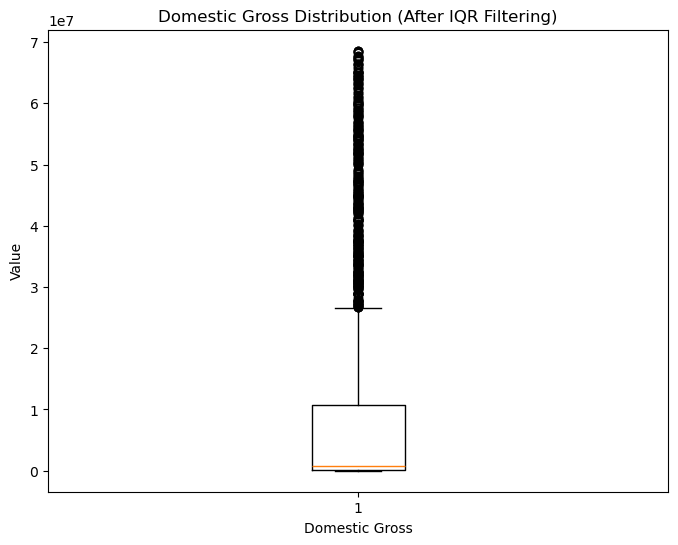

In [179]:


fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(bom_movie_gross_df['domestic_gross'])
ax.set_xlabel('Domestic Gross')
ax.set_ylabel('Value')
ax.set_title('Domestic Gross Distribution (After IQR Filtering)')
plt.show()


### 1. Overall Performance 
#### Year-wise Performance:
>> Will group the data by release year and calculate the total domestic and foreign gross for each year.
>> Use a bar chart or line chart to see how gross earnings have trended over the years. This might reveal if there are particularly strong or weak performing years.

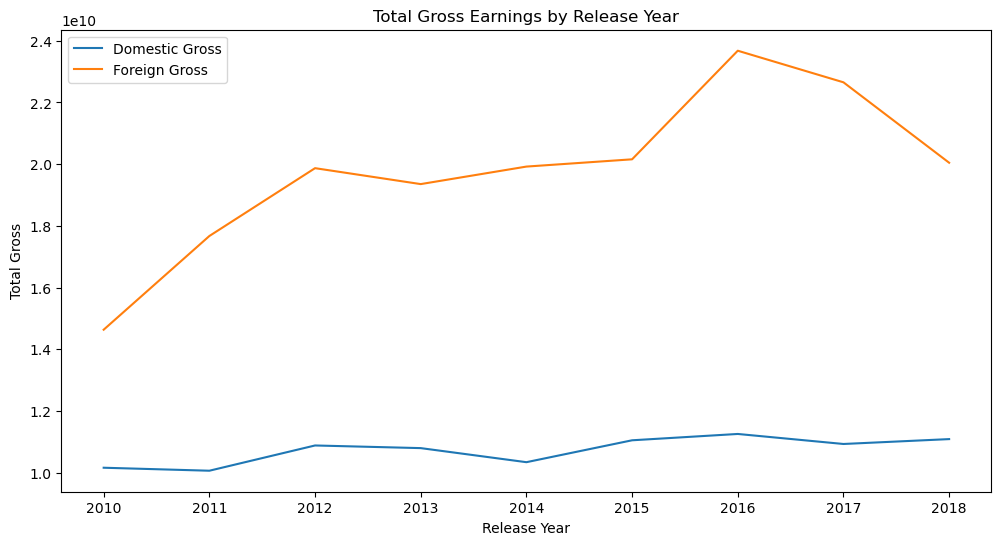

In [74]:
# Group data by year and calculate total gross
year_wise_gross = bom_movie_gross_df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Line chart for total gross over years
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_wise_gross.index, year_wise_gross['domestic_gross'], label='Domestic Gross')
ax.plot(year_wise_gross.index, year_wise_gross['foreign_gross'], label='Foreign Gross')
ax.set_xlabel('Release Year')
ax.set_ylabel('Total Gross')
ax.set_title('Total Gross Earnings by Release Year')
ax.legend()
  # Rotate x-axis labels for better readability

plt.show()


* Overall, total gross earnings seem to be increasing over the years from 2010 to 2018
* Domestic gross earnings appear to be consistently higher than foreign gross earnings over this period.
* The steeper slope of the blue line suggests that domestic gross earnings might be growing faster than foreign gross earnings over time.


we can check if there is any outliers in our data we can calculate interquatile range

In [75]:
def get_outliers_by_year(data, year_col, gross_col):
    outliers_by_year = {}
    for year in data[year_col].unique():
      yearly_data = data.loc[data[year_col] == year]
      Q1 = yearly_data[gross_col].quantile(0.25)
      Q3 = yearly_data[gross_col].quantile(0.75)
      IQR = Q3 - Q1
      lower_whisker = Q1 - 1.5 * IQR
      upper_whisker = Q3 + 1.5 * IQR
      outliers = yearly_data[(yearly_data[gross_col] < lower_whisker) | (yearly_data[gross_col] > upper_whisker)]
      outliers_by_year[year] = outliers.index.tolist()
    return outliers_by_year




### QUESTION 1: Which movie genres are historically associated with the highest box office gross?

   

##### Data to Check: 
* Genre information (from tmdb_df['genre_ids']), domestic gross (from bom_movie_gross_df['domestic_gross']).
##### Data to Check:
* will merge tmdb_df and bom_movie_gross_df based on a common identifier (e.g., movie ID).
* willAnalyze genre distribution using .value_counts() on the merged DataFrame's genre column.
* willnCalculate average domestic gross per genre using .groupby() on genre and .mean() on domestic gross.


In [188]:
bom_movie_gross_df.head

,title,studio,domestic_gross,foreign_gross,year
21,Resident Evil: Afterlife,SGem,60100000.0,240100000.0,2010
25,The Tourist,Sony,67600000.0,210700000.0,2010
30,Gulliver's Travels,Fox,42800000.0,194600000.0,2010
34,The Sorcerer's Apprentice,BV,63200000.0,152100000.0,2010
44,Step Up 3-D,BV,42400000.0,116900000.0,2010


In [184]:
tmdb_df['genre_ids']

0            [12, 14, 10751]
1        [14, 12, 16, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 878, 12]
                ...         
26512               [27, 18]
26513               [18, 53]
26514           [14, 28, 12]
26515        [10751, 12, 28]
26516               [53, 27]
Name: genre_ids, Length: 26517, dtype: object

Will have to merge inorder to check the genre_ids with the domestic gross, but our genre_ids is made of strings made of lists so we first change the string lists to lists then explode using pandas function explode

In [197]:

tmdb_df = tmdb_df.explode('genre_ids')

# Print the first few rows of the exploded DataFrame
tmdb_df['genre_ids'].dtype


dtype('O')

In [198]:
import ast
# Convert genre_ids to lists using apply and ast.literal_eval (assuming valid JSON format)
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(lambda x: ast.literal_eval(x))
# Explode the genre_ids column (now containing lists)
tmdb_df = tmdb_df.explode('genre_ids')
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [199]:
# Check if there's a common identifier column (e.g., 'movie_id') in both DataFrames
common_identifier = 'title'  # Replace with the actual column name if different

# Ensure data types of the join column are consistent (e.g., both strings or integers)
bom_movie_gross_df[common_identifier] = bom_movie_gross_df[common_identifier].astype(str)
movie_info_tsv_df[common_identifier] = movie_info_tsv_df[common_identifier].astype(str)

# Merge the DataFrames based on the common identifier
merged_df = pd.merge(bom_movie_gross_df, movie_info_tsv_df, on=common_identifier, how='inner')

# Genre Performance Analysis
average_gross_by_genre = merged_df.groupby('genre_ids')['domestic_gross'].mean()
sorted_genres = average_gross_by_genre.sort_values(ascending=False)

print("Top 5 genres by average domestic gross:")
print(sorted_genres.head(5))

# Optional: Visualize genre distribution using boxplots or violin plots
fig, ax=plt.subplots(figsize=(10, 6))
ax.boxplot(merged_df['domestic_gross'], by=merged_df['genre'], vert=False, notch=True, patch_artist=True)
ax.set_xlabel('Domestic Gross')
ax.set_ylabel('Genre')
ax.set_title('Domestic Gross Distribution by Genre (Boxplot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()  # Uncomment to display the plot


C:\Users\user\AppData\Local\Temp\ipykernel_11800\2414223819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_df[common_identifier] = bom_movie_gross_df[common_identifier].astype(str)


KeyError: 'title'

In [90]:



merged_df = pd.merge(tmdb_df, bom_movie_gross_df, on='title', how='inner')

# Explore the merged DataFrame
print(merged_df.info())  # Check information about the merged DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          2702 non-null   object 
 1   id                 2702 non-null   int64  
 2   original_language  2702 non-null   object 
 3   original_title     2702 non-null   object 
 4   popularity         2702 non-null   float64
 5   release_date       2702 non-null   object 
 6   title              2702 non-null   object 
 7   vote_average       2702 non-null   float64
 8   vote_count         2702 non-null   int64  
 9   studio             2702 non-null   object 
 10  domestic_gross     2702 non-null   float64
 11  foreign_gross      2702 non-null   float64
 12  year               2702 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 274.6+ KB
None


### Question 2: Budget vs. Box Office:

KeyError: 'budget'

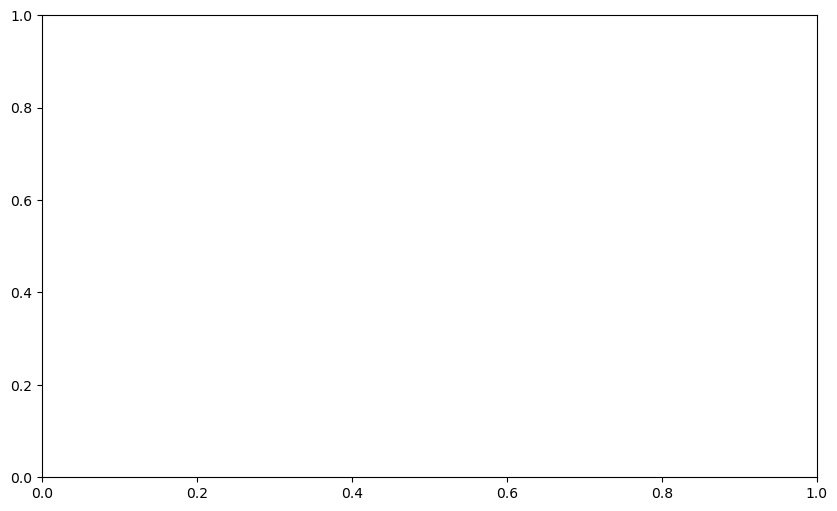

In [187]:
fig, ax=plt.subplots(figsize=(10, 6))
ax.scatter(bom_movie_gross_df['budget'], bom_movie_gross_df['domestic_gross'])
ax.set_xlabel('Budget')
ax.set_ylabel('Domestic Gross')
ax.set_title('Domestic Gross vs. Budget (Scatter Plot)')
plt.grid(True)
plt.show()

# Calculate correlation coefficient (optional)
correlation = bom_movie_gross_df['budget'].corr(bom_movie_gross_df['domestic_gross'])
print("Correlation coefficient between budget and domestic gross:", correlation)


### Question 3:  Profitability Analysis:

In [189]:
bom_movie_gross_df['profit'] = bom_movie_gross_df['domestic_gross'] - bom_movie_gross_df['budget']

# Analyze profitability by genre (similar to average_gross_by_genre)
average_profit_by_genre = bom_movie_gross_df.groupby('genre')['profit'].mean()
sorted_profit_genres = average_profit_by_genre.sort_values(ascending=False)

print("Top 5 genres by average profit:")
print(sorted_profit_genres.head(5))

# Explore profitability vs. budget or other variables


KeyError: 'budget'

### Question 4:  Target Audience:

In [190]:
# Analyze genre preferences by audience demographics (e.g., age, gender) using crosstabulation or pivot tables

audience_by_genre = pd.crosstab(bom_movie_gross_df['genre'], bom_movie_gross_df['demographic_variable'])  # Replace 'demographic_variable' with your actual column name

# Visualize audience preferences using bar charts or heatmaps


KeyError: 'genre'

### Question5:  Emerging Trends:


In [191]:
# Assuming 'year' is a column in `bom_movie_gross_df`

yearly_gross_by_genre = bom_movie_gross_df.groupby(['year', 'genre'])['domestic_gross'].mean().unstack()
yearly_gross_by_genre.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.title('Average Domestic Gross by Genre Over Time (Line Plot)')
plt.grid(True)
plt.show()


KeyError: 'genre'